In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools



In [4]:
dataset = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_outfall_20180101_20190930.nc')
dataset

<xarray.Dataset>
Dimensions:  (time: 21, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * time     (time) datetime64[ns] 2018-11-15 2018-12-16 ... 2020-07-15
Data variables:
    outfall  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_outfall_20180101_20190930
    description:  Month-averaged Outfall extracted from SalishSeaCast v202111...
    history:      2023-11-14 20:03 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [5]:
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth', 'y': 'gridY', 'x': 'gridX'})
tmask

<xarray.DataArray 'tmask' (depth: 40, gridY: 898, gridX: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: depth, gridY, gridX

In [6]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
mesh_mask_depth_var='gdept_0'
thalweg_file = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
depth = mesh.variables[mesh_mask_depth_var][:]
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)


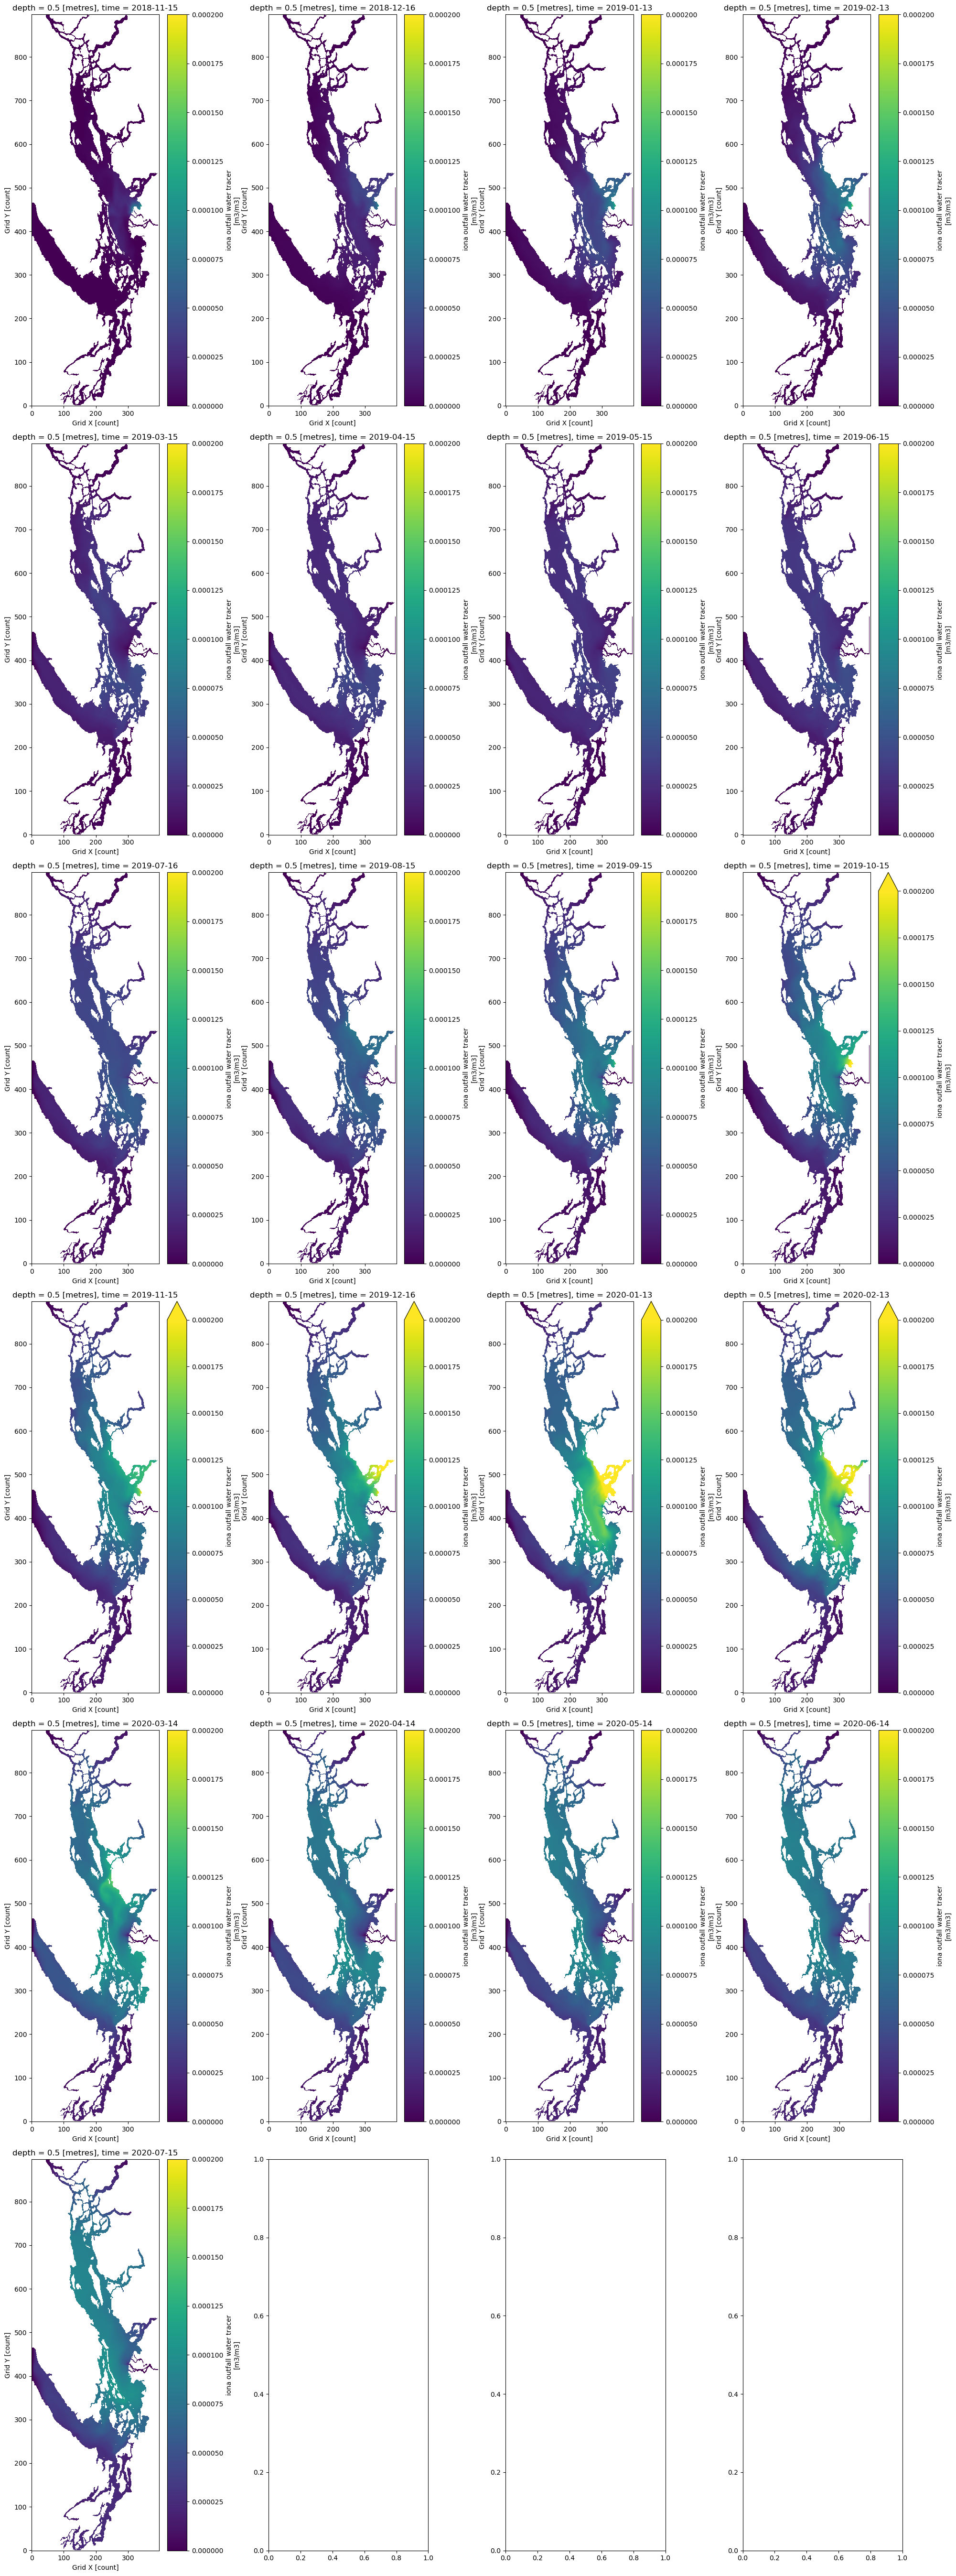

In [7]:
fig, axs = plt.subplots(6, 4, figsize=(20, 6*9))
ip = 0
jp = 0
for month in range(1, 12+9+1):
    dataset.outfall[month-1, 0].where(tmask[0]).plot(ax=axs[ip, jp], vmax=2e-4);
    jp = jp + 1;
    if jp == 4:
        ip = ip + 1
        jp = 0
fig.tight_layout();

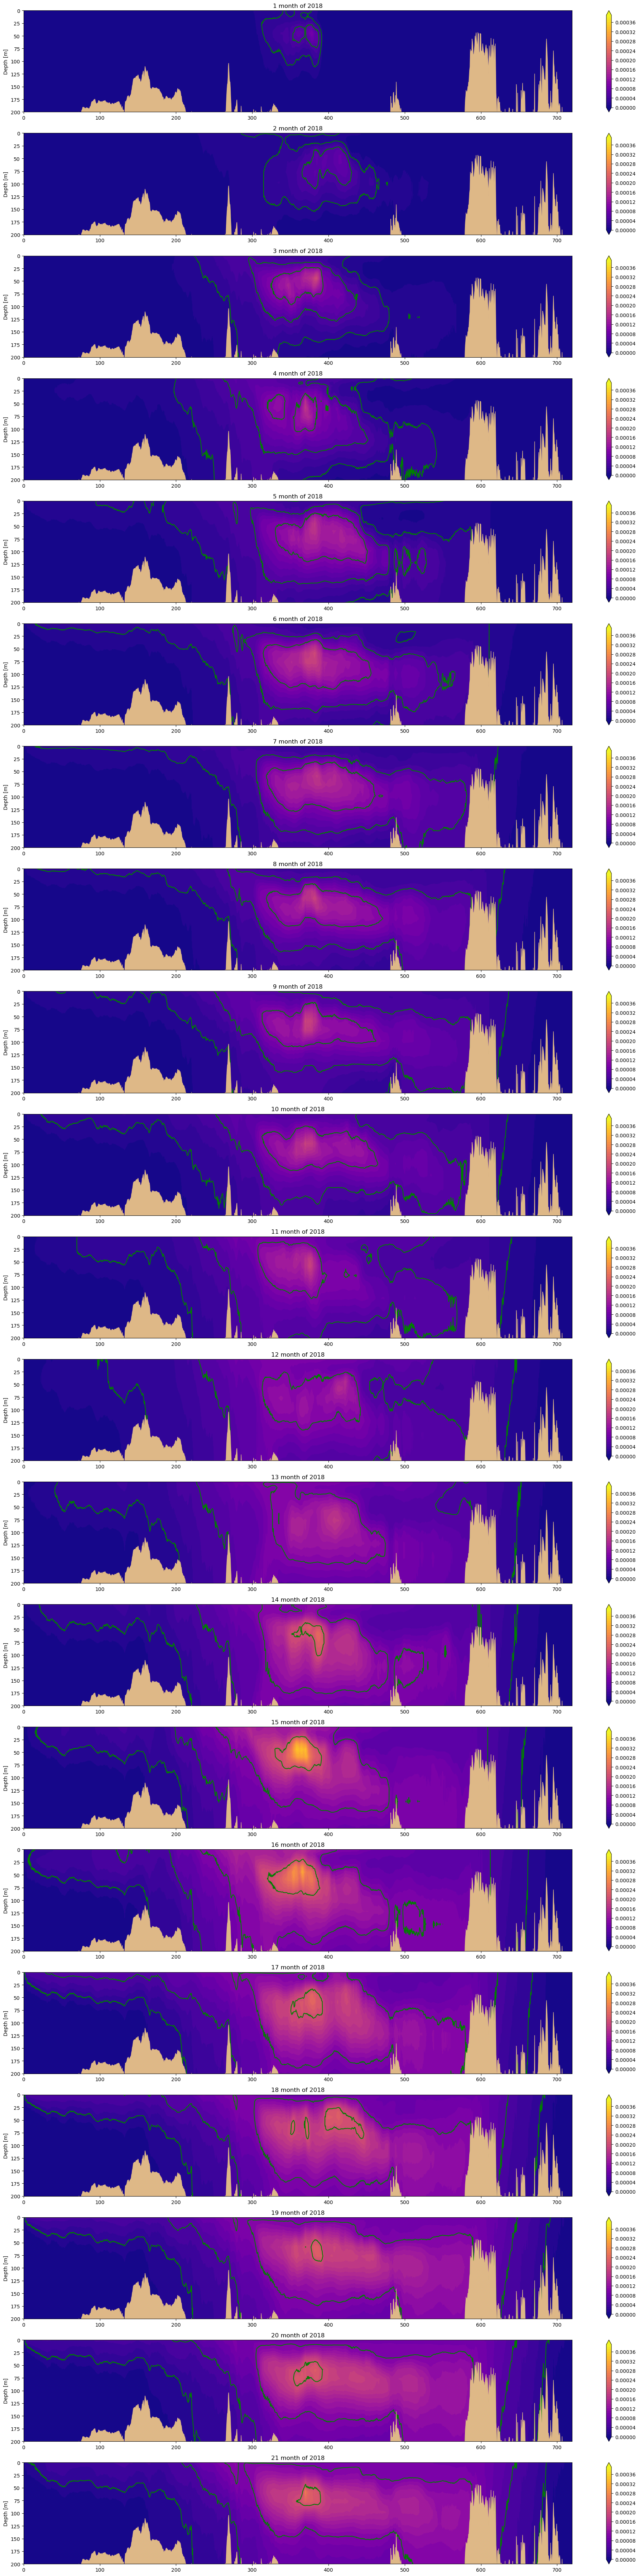

In [9]:
fig, axs = plt.subplots(21, 1, figsize=(20, 72))
jp = 0
for month in range(1, 12+9+1):
    dep_thal, distance, var_thal = vis.load_thalweg(
                depth[0, ...], np.array(dataset.outfall[month-1]), bathy['nav_lon'][:], bathy['nav_lat'][:],
                thalweg_pts)
    var_plot = vis._fill_in_bathy(var_thal, mesh, thalweg_pts)
    colours = axs[jp].contourf(distance, dep_thal, var_plot, np.arange(0, 4e-4, 1e-5), 
                                     cmap='plasma', extend='both', zorder=-1)
    axs[jp].contour(distance, dep_thal, var_plot, [2e-5, 5e-5, 1e-4, 2e-4], 
                                     colors='green', zorder=0)
    vis._add_bathy_patch(
            distance, bathy['Bathymetry'][:], thalweg_pts, axs[jp], color='burlywood')
    cbar = fig.colorbar(colours, ax=axs[jp])
    axs[jp].invert_yaxis()
    axs[jp].set_ylim(200, 0)
    axs[jp].set_ylabel('Depth [m]');
    axs[jp].set_title(f'{month} month of 2018')
    jp = jp + 1;
fig.tight_layout();

In [29]:
245/12

20.416666666666668

In [31]:
20.42/30 * 9.5

6.466333333333334

In [35]:
6.66*4*2 + 14

67.28

In [36]:
67.28/245

0.2746122448979592